# Regressão linear simples do zero

## Resumo

Nesse código implementamos uma regressão linear simples do zero. Considerando dados aleatórios, calculamos o coeficiente de
correlação de Pearson, em seguida implementamos a regressão linear utilizando do método dos mínimos quadrados. E por fim,
fazemos a regressão linear e plotamos os resíduos.


## Introdução 

Regressão linear é um dos modelos estatísticos mais utilizados na prática. Como exemplo mais simples, podemos citar dados distribuídos de forma pareada numa tabela da seguinte maneira: $(x_1, y_1), ..., (x_n, y_n)$ com $x_1, ..., x_n, y_1, ..., y_n \in X, Y$ sendo variáveis contínuas num contexto em que sabemos que elas, a priori, são variáveis explicativa (preditora) e resposta (target), respectivamente. Esses dados podem representar os salários e o nível de escolaridade de seus funcionários ou salário dependente da experiência. Este é um problema de regressão onde os dados relativos a cada funcionário representam uma observação. A suposição é que a experiências e educação são características independentes, enquanto o salário depende delas. Essa relação é representada por meio de uma equação que associa as variáveis resposta $Y$ e a preditora $X$. No caso onde temos $n$ pares de dados, o modelo de regressão linear simples relaciona essas variáveis de maneira linear da seguinte maneira, 

\begin{equation*}
y_{i} = \alpha + \beta x_i + e_i,
\label{eq:1} \tag{1}
\end{equation*}

onde 

$y_i$ representa o valor da variável resposta, $Y$, na observação $i$, $i = 1,...n$ (aleatória);

$x_i$ representa o valor da variável preditora, $X$, na observação $i$, $i = 1,...n$ (não aleatória);

$e_i$, $i = 1,...n$ são variáveis aleatórias que correspondem ao erro (variável que permite
explicar a variabilidade existente em $Y$ e que não é explicada por ܺ$X$);

$\alpha$ é uma constante que representa a interceptação da reta com o eixo vertical;

$\beta$ representa a inclinação (coeficiente angular) em relação à variável resposta.
 
Note que para $X = 0$, isto é, quando a reta regressora corta o eixo $y$, temos o valor de $\alpha$, que é denominado de coeficiente linear (intercept). Já o parâmetro $\beta$ representa a inclinação da reta (slope).

## Método dos mínimos quadrados

Supondo que existe efetivamente uma relação linear entre $X$ e $Y$, então podemos perguntar como estimar os parâmetros $\alpha$ e $\beta$? Assumindo que os erros $e_i$ são não correlacionados, tenham média $0$ e variância $\sigma^2$. Um possível método para obtenção dos estimadores consiste em determinar $\hat{\alpha}$ e $\hat{\beta}$ que minimizem a distância entre cada observação o valor esperado definido por $E(y) = \alpha + \beta x_i$. O método dos mínimos quadrados consiste em obter os coeficientes $\alpha$ e $\beta$, minimizando os resíduos do modelo de regressão linear, calculados como a diferença entre os valores observados, $y_i$, e os valores estimados, $\hat{y}_i$, ou seja

\begin{equation*}\label{eq:2} \tag{2}
\hat{e}_{i} = y_i - \hat{y}_i, \quad \quad i = 1, ...,n.
\end{equation*}

Então a partir desse método, podemos obter os valores de $\alpha$ e $\beta$ para os quais a soma dos quadrados dos resíduos é minima. Assim, 

\begin{equation}\label{eq:3} \tag{3}
Q(\alpha, \beta) = \sum_{i = 1}^{n} e_{i}^{2} = \sum_{i = 1}^{n}(y_i - \alpha - \beta x_i)^2.
\end{equation}

Os estimadores $\hat{\alpha}$ e $\hat{\beta}$ são obtidos minimizando a Eq. $\eqref{eq:3}$ em relação a $\alpha$ e $\beta$, isto é, derivamos $Q(\alpha, \beta)$ em relação a esses parâmetros e igualamos a zero. Dessa forma, obtemos

\begin{equation}\label{eq:4} \tag{4}
\hat{\beta} = \frac{\sum_{i = 1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i = 1}^{n}(x_i - \bar{x})^2},
\end{equation}
e

\begin{equation}\label{eq:5} \tag{5}
\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x},
\end{equation}

onde $\bar{x}$ e $\bar{y}$ são as médias. Chegamos no resultado que queriamos: a partir dos dados tabelados $X$ e $Y$, podemos obter $\alpha$, $\beta$ e os resíduos. 

Algumas diretrizes são importantes para usarmos a regressão linear: verificar a correlação entre as variáveis lembrando que correlação não implica em causalidade, fique dentro do intervalo dos dados e certifique-se de não extrapolar e não faça previsões para um conjunto de dados baseado em regressão linear de outro dataset.

Próximo passo é construir o código.

## Regressão linear em ação

In [1]:
# Importando bibliotecas importantes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline 

In [2]:
# Resultados consistentes 
np.random.seed(1) 

# Dados gerados aleatoriamente
x = np.linspace(-15, 15, 50)
y = x * 0.5 + 2 + np.random.normal(0, 2, size = 50)

# Verificando se as variáveis são correlacionadas
Rxy = np.corrcoef(x,y)
Rxy

array([[1.        , 0.92421207],
       [0.92421207, 1.        ]])

Podemos ver que os dados gerados possuem uma correlação forte positiva $(0.8 \le R_{xy} < 1)$. 

A seguir, iremos implementar as Eqs. $(1)$, $(2)$, $(4)$ e $(5)$.

In [3]:
class linear_regression(object):
    '''
    Info:
        Classe para calcular os parâmetros alfa, beta, coeficiente de determinação e os resíduos normalizados. 
    ----------
    Input:
        Depedendo da função que se quer utilizar:
        x: Variável preditora [list]
        y: Variável resposta [list]
        alpha: Coeficiente linear (intercept) [float]
        beta: Inclinação da reta (slope) [float]
    ----------
    Output:
        y_pred: Variável resposta prevista [list]
        alpha: Coeficiente linear (intercept) [float]
        beta: Inclinação da reta (slope) [float]
        r_squared: Coeficiente de determinação [float]
        residuals_normal: Resíduos normalizados [list]
    '''

    def __init__(self):
        pass
    
    # Estimadores de mínimos quadrados
    def least_squares_fit(self, x, y):
        
        x_bar, y_bar = np.mean(x), np.mean(y)
        beta = sum((x_i - x_bar)*(y_i - y_bar) for x_i, y_i in zip(x, y))/sum((x_i - x_bar)**2 for x_i in x)
        alpha = y_bar - beta*x_bar
        
        return alpha, beta

    # Modelo de regressão linear
    def predict(self, alpha, beta, x):
        y_pred = alpha + beta*x 
        return y_pred

    # erro de prever alpha + beta*x_i quando o valor real é y_i  (y - y_predict) (resíduos)
    def error(self, alpha, beta, x, y):
        return y - self.predict(alpha, beta, x)
    
    # soma dos erros quadráticos
    def sum_of_sqerrors(self, alpha, beta, x, y):
        return sum(self.error(alpha, beta, x_i, y_i)**2 for x_i, y_i in zip(x, y))

    # Variação quadrática total da média da variável resposta
    def total_sum_of_squares(self, y):
        y_bar = np.mean(y)
        return sum((y_i - y_bar)**2 for y_i in y)

    # Cálculo do coeficiente de determinação
    def r_squared(self, alpha, beta, x, y):
        return 1.0 - (self.sum_of_sqerrors(alpha, beta, x, y)/self.total_sum_of_squares(y))
    
    # Resíduos normalizados
    def residuals_normal(self, alpha, beta, x, y):
        
        x_bar = np.mean(x)
        n = len(x)
        S = np.sqrt((1.0/(n - 2))*self.sum_of_sqerrors(alpha, beta, x, y))
        h_ii = 1.0/n + (x - x_bar)**2/sum((x_i - x_bar)**2 for x_i in x)
        
        return self.error(alpha, beta, x, y)/(S*np.sqrt(1.0 - h_ii))

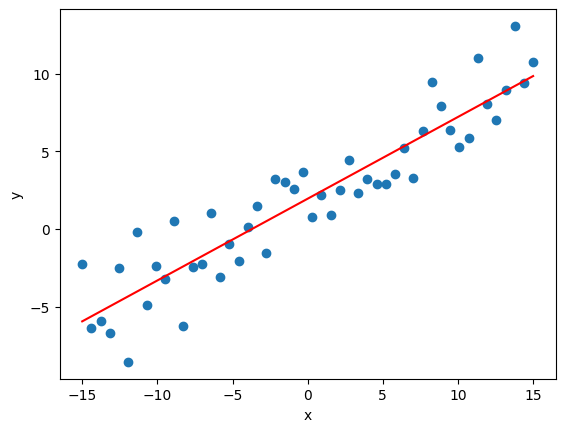

In [4]:
# Carregando a classe linear_regression
reg = linear_regression() 

# Calculando alpha e beta
alpha, beta = reg.least_squares_fit(x, y)

# Plotando o gráfico de dispersão com a linha de tedência da regressão linear
plt.scatter(x, y)
plt.plot(x, reg.predict(alpha, beta, x), color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('figures/fig1', dpi=300)
plt.show()

In [5]:
print('''Os valores de alpha e beta são {:.3f} e {:.3f}. 
O coeficiente de determinação é R²= {:.3f}.'''.format(alpha, beta, reg.r_squared(alpha, beta, x, y)))

Os valores de alpha e beta são 1.949 e 0.527. 
O coeficiente de determinação é R²= 0.854.


Ou seja, 85% dos dados se ajustam ao modelo de regressão.

Uma das ferramentas mais úteis para verificar a qualidade do ajuste do modelo de regressão linear é o gráfico de resíduos. Nesse gráfico abaixo temos nos eixos das ordenadas são dispostos os resíduos $\hat{e}$ e os valores da variável preditora, no eixo das abscissas. Para facilitar a visualização em relação a dispersão dos resíduos e para efeito de comparação entre ajustes do modelos nos quais as variáveis respostas têm unidades de medidas diferentes, convém padronizá-los, ou seja, divido-los pelo respectivo desvio padrão para que tenham variância igual a 1.

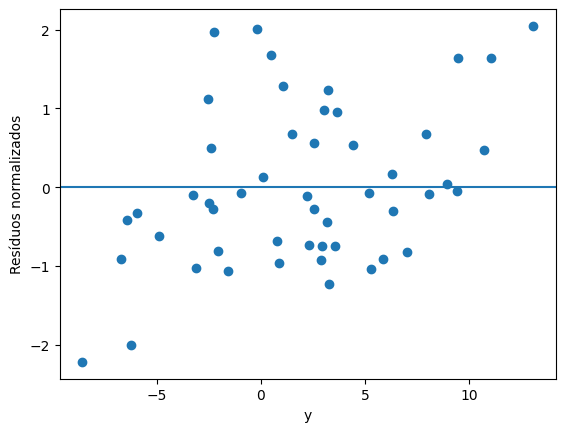

In [6]:
# Salvando x, residuos e resíduos padronizados.
np.savetxt('../data/processed/residuals_model_1.txt', np.column_stack([x, reg.error(alpha, beta, x, y), 
                                                              reg.residuals_normal(alpha, beta, x, y)]), fmt='%6.5f')

# Plotando os resíduos normalizados
plt.scatter(y, reg.residuals_normal(alpha, beta, x, y))
plt.axhline(y=0)
plt.xlabel('y')
plt.ylabel('Resíduos normalizados')
plt.show()

Após obter os valores de $\alpha = 1.949$ e $\beta = 0.527$, podemos utilizar a função de predição $y_{pred}= 1.949 + 0.527 x$ para obter alguns valores previstos.

In [7]:
# Usando os valores obtidos de alpha e beta para calcular os valores previstos da variável resposta.
y_pred = reg.predict(alpha, beta, x)
y_pred

array([-5.95775716, -5.63503359, -5.31231002, -4.98958645, -4.66686288,
       -4.34413931, -4.02141574, -3.69869217, -3.3759686 , -3.05324503,
       -2.73052146, -2.40779789, -2.08507432, -1.76235075, -1.43962718,
       -1.11690361, -0.79418004, -0.47145647, -0.1487329 ,  0.17399067,
        0.49671424,  0.81943781,  1.14216138,  1.46488495,  1.78760852,
        2.11033209,  2.43305566,  2.75577923,  3.0785028 ,  3.40122637,
        3.72394994,  4.04667351,  4.36939708,  4.69212065,  5.01484422,
        5.33756779,  5.66029136,  5.98301493,  6.3057385 ,  6.62846207,
        6.95118564,  7.27390921,  7.59663278,  7.91935635,  8.24207992,
        8.56480349,  8.88752706,  9.21025063,  9.5329742 ,  9.85569777])

In [8]:
# Dataframe com os valores atuais e os previstos.
new_df = pd.DataFrame({"valor_atual": y, "valor_previsto": y_pred})
new_df.head()

,valor_atual,valor_previsto
0,-2.251309,-5.957757
1,-6.417390,-5.635034
2,-5.944099,-5.312310
3,-6.727570,-4.989586
4,-2.544695,-4.666863


### Referências Bibliográficas

Estatística e Ciências de Dados - Morettin e Singer 2022

Data Science from scratch - Grus 2019